In [1]:
from astropy.io import fits
from astropy.nddata import NDData, CCDData, Cutout2D
import numpy as np
import matplotlib.pyplot as plt
from os import path

hst_cat = fits.open('3D-HST_cat.fits')
hst_cat[1].header['TTYPE11'] = 'F435W'
data_cat = hst_cat[1].data

In [18]:
data_cat

FITS_rec([(28163, 'COSMOS', 150.0587, 2.4773781, 10854.3, 25785.0, 1.9313, 79.237999, -99.0, 115.74, -99.0, 89.463997, -99.0, 83.252998, -99.0, 7.4891081, 0.078977391),
          (26410, 'COSMOS', 150.06215, 2.4550145, 10647.9, 24443.1, 1.2299, 92.503998, -99.0, 99.379997, -99.0, 43.191002, -99.0, 51.277, -99.0, 8.4377155, 0.26332259),
          (31996, 'COSMOS', 150.10269, 2.5302751, 8217.4004, 28958.801, 2.01, 224.03, -99.0, 291.70999, -99.0, -99.0, -99.0, -99.0, -99.0, 8.926219, 0.01811873),
          (14596, 'COSMOS', 150.06456, 2.329035, 10503.7, 16884.301, 1.9582, 29.558001, 31.212999, 33.289001, -99.0, 9.5467997, -99.0, 18.393, -99.0, 8.5424023, 0.49544251),
          (952, 'COSMOS', 150.19977, 2.1908524, 2397.7, 8593.4004, 1.9289, 60.146999, -99.0, 77.085999, -99.0, 49.486, -99.0, 53.325001, -99.0, 8.8114119, 0.059397079),
          (17269, 'COSMOS', 150.12369, 2.3582501, 6958.8999, 18637.1, 0.98040003, 171.17, 168.44, 199.8, -99.0, 68.272003, -99.0, 85.450996, -99.0, 7.7839661

/tmp/ipykernel_23706/699941121.py:9: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(cutout.data))


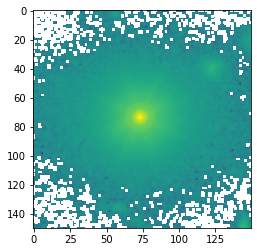

In [5]:
x, y = hst_cat[1].data[13]['x'], hst_cat[1].data[13]['y']

cosmos_F125W = fits.open('SCI_image/GOODS-S/goodss_3dhst.v4.0.F125W_orig_sci.fits')
data = cosmos_F125W[0].data
ccd = CCDData(data, unit='adu')
position = (x, y)
size = 150
cutout = Cutout2D(ccd, position, size)
plt.imshow(np.log10(cutout.data))
outputccd = CCDData(cutout.data, unit='adu')
outputccd.write('../big.fits')

In [3]:
cosmos_F140W = fits.open('SCI_image/COSMOS/cosmos_3dhst.v4.0.F140W_orig_sci.fits')
data_140 = cosmos_F140W[0].data
ccd_140 = CCDData(data_140, unit='adu')
cutout_140 = Cutout2D(ccd_140, position, (50, 50))
plt.imshow(cutout_140.data)

In [2]:
# cosmos image cut
size = (69, 69)
cosmos_band_list = ['F125W', 'F140W', 'F160W', 'F606W', 'F814W']
for i in range(9):
    for band in cosmos_band_list:
        if data_cat[i][band]!=-99.:
            position = (data_cat[i]['x'], data_cat[i]['y'])
            image_file = fits.open(path.join('SCI_image/', data_cat[i]['field'], 
                                             str.lower(data_cat[i]['field']) + '_3dhst.v4.0.' + band + '_orig_sci.fits'))
            ccd = CCDData(image_file[0].data, unit='adu')
            cutout = Cutout2D(ccd, position, size)
            outputccd = CCDData(cutout.data, unit='adu')
            fname = '%02d'%i + '_3dhst_' + str(data_cat[i]['ID']) + '_' + band + '.fits'
            outputccd.write(path.join('cutouts', 'cosmos', fname))
            print('%d image successfully cut...'%(i+1))

1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
3 image successfully cut...
3 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
5 image successfully cut...
5 image successfully cut...
5 image successfully cut...
5 image successfully cut...
6 image successfully cut...
6 image successfully cut...
6 image successfully cut...
6 image successfully cut...
6 image successfully cut...
7 image successfully cut...
7 image successfully cut...
7 image successfully cut...
7 image successfully cut...
7 image successfully cut...
8 image successfully cut...
8 image successfully cut...
8 image successfully cut...
8 image successfully cut...
9 image successfully cut...
9 image successfully cut...
9 image successfully

In [32]:
# goods-s image cut
size = (50, 50)
goodss_band_list = ['F125W', 'F140W', 'F160W', 'F435W', 'F606W', 'F775W', 'F814W', 'F850LP']
for i in range(13, 17):
    for band in goodss_band_list:
        if data_cat[i][band]!=-99.:
            position = (data_cat[i]['x'], data_cat[i]['y'])
            image_file = fits.open(path.join('SCI_image/', data_cat[i]['field'], 
                                             'goodss' + '_3dhst.v4.0.' + band + '_orig_sci.fits'))
            ccd = CCDData(image_file[0].data, unit='adu')
            cutout = Cutout2D(ccd, position, size)
            outputccd = CCDData(cutout.data, unit='adu')
            fname = '%02d'%i + '_3dhst_' + str(data_cat[i]['ID']) + band + '.fits'
            outputccd.write(path.join('cutouts', 'goodss', fname))
            print('%d image successfully cut...'%(i-12))

1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...


In [34]:
# uds image cut
size = (50, 50)
uds_band_list = ['F125W', 'F140W', 'F160W', 'F606W', 'F814W']
for i in range(9, 13):
    for band in uds_band_list:
        if data_cat[i][band]!=-99.:
            position = (data_cat[i]['x'], data_cat[i]['y'])
            image_file = fits.open(path.join('SCI_image/', data_cat[i]['field'], 
                                             str.lower(data_cat[i]['field']) + '_3dhst.v4.0.' + band + '_orig_sci.fits'))
            ccd = CCDData(image_file[0].data, unit='adu')
            cutout = Cutout2D(ccd, position, size)
            outputccd = CCDData(cutout.data, unit='adu')
            fname = '%02d'%i + '_3dhst_' + str(data_cat[i]['ID']) + band + '.fits'
            outputccd.write(path.join('cutouts', 'uds', fname))
            print('%d image successfully cut...'%(i-8))

1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
1 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
2 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
3 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...
4 image successfully cut...


In [33]:
for i in range(9, 13):
    print(data_cat[i]['field'])

UDS
UDS
UDS
UDS


In [29]:
hst_cat[1].header['TTYPE11'] = 'F435W'